In [1]:
%%capture
!git clone https://github.com/IS737StockPicker/stonks

In [32]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Pulls Stock Data from CSV file to DataFrame<p>
Also converts the date string into a datetime format for easier merging of news sentiment data frames

In [37]:
stocks_df = pd.read_csv('/content/stonks/STOCKS_WIN_LOSE.csv')

for index, rows in stocks_df.iterrows():
  stripped_date = stocks_df['Date'].iloc[index]
  stripped_date = stripped_date[:len(stripped_date)-15]
  stocks_df['Date'].iloc[index] = stripped_date
stocks_df['Date']= pd.to_datetime(stocks_df['Date'], format= '%Y-%m-%d')
stocks_df

<ipython-input-37-ad6a1bff3406>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_df['Date'].iloc[index] = stripped_date


,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,XLB,XLP,SPY,^DJI,NDX
0,2022-09-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2022-09-14,1,0,1,0,0,0,1,0,1,0,0,1,0,1
2,2022-09-15,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,2022-09-16,0,1,0,1,1,1,1,1,0,0,1,1,0,1
4,2022-09-19,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2023-03-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0
121,2023-03-08,0,0,1,1,1,0,0,1,1,1,1,1,0,1
122,2023-03-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0
123,2023-03-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    125 non-null    datetime64[ns]
 1   XLE     125 non-null    int64         
 2   XLF     125 non-null    int64         
 3   XLU     125 non-null    int64         
 4   XLI     125 non-null    int64         
 5   XLK     125 non-null    int64         
 6   XLV     125 non-null    int64         
 7   XLY     125 non-null    int64         
 8   IYR     125 non-null    int64         
 9   AAPL    125 non-null    int64         
 10  XLB     125 non-null    int64         
 11  XLP     125 non-null    int64         
 12  SPY     125 non-null    int64         
 13  ^DJI    125 non-null    int64         
 14  NDX     125 non-null    int64         
dtypes: datetime64[ns](1), int64(14)
memory usage: 14.8 KB


Heatmap of the different stock tickers. We do not want to use stock tickers that are highly correlated to one another because we want to narrow down the number of tickers we examine

<ipython-input-10-c18b4f82c138>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stocks_df.corr(), cmap="YlGnBu", annot=True, vmin = 0, vmax = 1)


<Axes: >

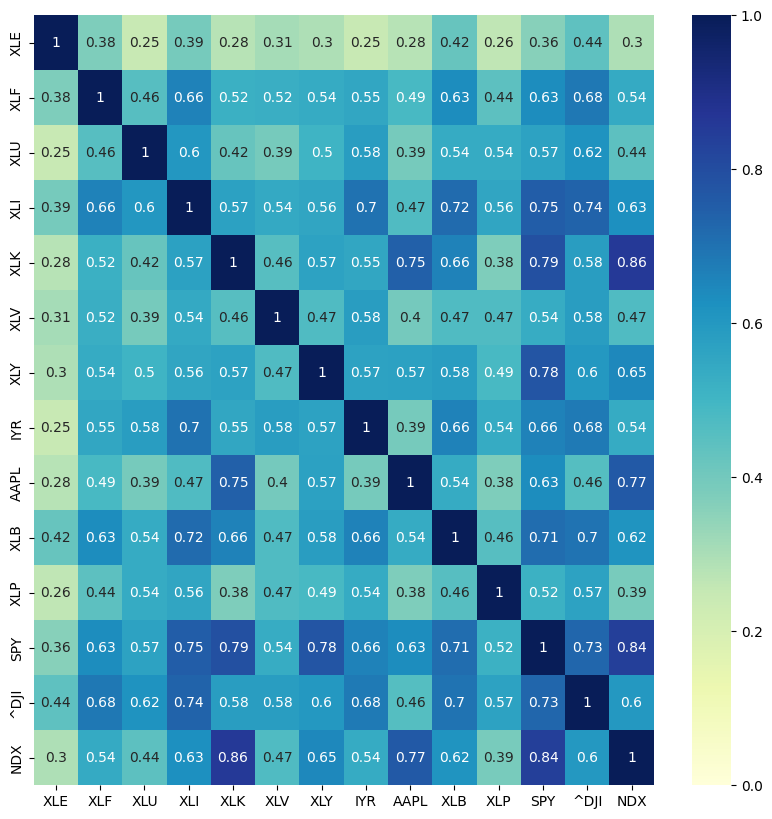

In [10]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(stocks_df.corr(), cmap="YlGnBu", annot=True, vmin = 0, vmax = 1)

Importing Guardian News Sentiment CSV into df

In [42]:
guardian_df = pd.read_csv('/content/stonks/guardian_data.csv')
guardian_df['Date']= pd.to_datetime(guardian_df['Date'], format= '%Y-%m-%d')
guardian_df


,Date,Headline Mean,Body Mean,Headline Median,Body Median
0,2022-09-13,-0.11,0.06,0.00,0.54
1,2022-09-14,-0.12,0.18,0.00,0.79
2,2022-09-15,-0.13,0.03,-0.12,0.28
3,2022-09-16,-0.17,-0.16,-0.13,-0.77
4,2022-09-17,-0.18,-0.09,-0.10,-0.65
...,...,...,...,...,...
177,2023-03-09,-0.12,0.14,0.00,0.70
178,2023-03-10,-0.11,-0.05,0.00,-0.50
179,2023-03-11,-0.10,0.04,0.00,0.22
180,2023-03-12,-0.06,0.26,0.00,0.89


Merging the two df together using the "Date" as the anchor column

In [49]:
merged_df = pd.merge(stocks_df,guardian_df, how="left", on="Date")
merged_df = merged_df.dropna()
merged_df

,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,XLB,XLP,SPY,^DJI,NDX,Headline Mean,Body Mean,Headline Median,Body Median
0,2022-09-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.11,0.06,0.00,0.54
1,2022-09-14,1,0,1,0,0,0,1,0,1,0,0,1,0,1,-0.12,0.18,0.00,0.79
2,2022-09-15,0,1,0,0,0,1,0,0,0,0,0,0,0,0,-0.13,0.03,-0.12,0.28
3,2022-09-16,0,1,0,1,1,1,1,1,0,0,1,1,0,1,-0.17,-0.16,-0.13,-0.77
4,2022-09-19,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-0.17,-0.13,-0.15,-0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2023-03-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.13,-0.05,0.00,-0.59
121,2023-03-08,0,0,1,1,1,0,0,1,1,1,1,1,0,1,-0.12,-0.09,0.00,-0.34
122,2023-03-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.12,0.14,0.00,0.70
123,2023-03-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.11,-0.05,0.00,-0.50


In [50]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             125 non-null    datetime64[ns]
 1   XLE              125 non-null    int64         
 2   XLF              125 non-null    int64         
 3   XLU              125 non-null    int64         
 4   XLI              125 non-null    int64         
 5   XLK              125 non-null    int64         
 6   XLV              125 non-null    int64         
 7   XLY              125 non-null    int64         
 8   IYR              125 non-null    int64         
 9   AAPL             125 non-null    int64         
 10  XLB              125 non-null    int64         
 11  XLP              125 non-null    int64         
 12  SPY              125 non-null    int64         
 13  ^DJI             125 non-null    int64         
 14  NDX              125 non-null    int64    

<ipython-input-51-1591375d5e5f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(guardian_df.corr(), cmap="YlGnBu", annot=True, vmin = 0, vmax = 1)


<Axes: >

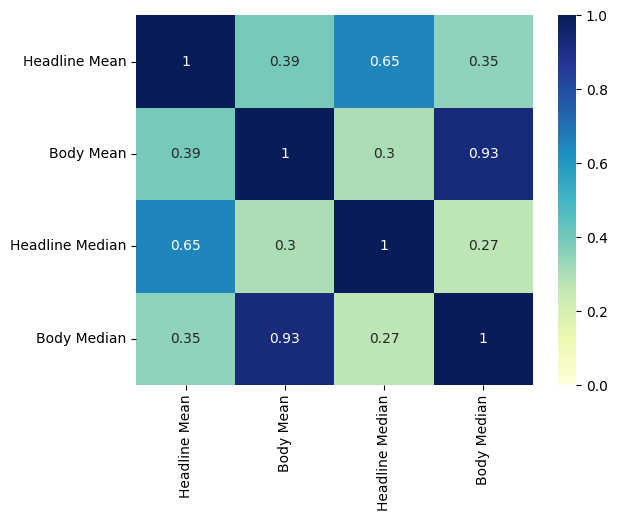

In [51]:
sns.heatmap(guardian_df.corr(), cmap="YlGnBu", annot=True, vmin = 0, vmax = 1)